##  BUSINESS UNDERSTANDING

# Overview

In a car hire business you first need to understand the fleet composition and identify key patterns in car hire inventory based on attributes such as year, model, make, fuel consumption, and transmission type.Make data-driven decisions for fleet management, cost efficiency, and customer satisfaction.Newer cars may attract customers due to better feature and reliability while older cars may need more maintenance, potentially increasing operational cost.Popular models may dominate certain years, but variety is important for attracting different customer segments.Cars with better fuel efficiency reduce operational costs and appeal to environmentally-conscious customers.
Transmission preference can vary by customer segment and region. For instance, tourists often prefer automatic cars because they are easier to drive in unfamiliar areas, especially with heavy traffic. On the other hand, manual cars can be more fuel-efficient and may appeal to price-conscious customers or those who prefer a more engaging driving experience.
A car hire business can maximize its profitability and customer satisfaction by maintaining a fleet that is diverse, efficient, and tailored to the needs of its customers. By leveraging data on car characteristics like year, model, make, fuel consumption, and transmission type, the business can make informed decisions that improve fleet performance, operational costs, and customer experience.

#  Problem Statement

The business is required to optimize the car fleet to meet customer demands, reduce operational costs, and maintain competitive pricing while ensuring customer satisfaction.
The goal is to
Optimize the fleet composition to meet customer demand for different makes, models, years, and transmission types.
Incorporate fuel-efficient and environmentally-friendly vehicles to reduce costs and appeal to eco-conscious customers.
Achieve a balance between automatic and manual cars based on customer preferences and regional demands.
Leverage data-driven insights to make informed decisions about which cars to add, phase out, or replace to improve fleet performance, customer satisfaction, and profitability.
The problem is about ensuring that the car hire business has an optimized fleet that aligns with customer needs, reduces operational costs, and stays competitive in the market. By addressing these challenges, the business can improve its operations, increase customer satisfaction, and drive profitability.

#  Objectives



a. Analyze vehicle performance across different makes and models, through assesment of the fuel efficiency, emissions, and other performance metrics (such as engine size, number of cylinders, and transmission type) for various vehicle makes and models..

b. Indentify the most popular vehicle classes for car rental Examine the relationship between vehicle class (e.g., compact, mid-size, subcompact) and rental market demand. Consider which classes are likely to appeal to different customer segments (business travelers, tourists, local renters).

c. Evaluate the cost and environmental impact of potential fleet vehicles Using the datasets on fuel consumption and emissions to calculate the long-term operational costs and environmental impact of various makes and models.

d. Perform a comparative analysis of vehicle makes and models.

e. Assess vehicle longevity and maintenance costs by analysis of vehicle engine size, transmission type, and fuel consumption data to predict potential long-term maintenance costs and vehicle longevity for each make and model.


#  Data Understanding

The Dataset was collected in 2022 to improve energy efficiency, Track environmental impact by Monitoring fuel consumption is crucial to understanding its impact on greenhouse gas (GHG) emissions, as burning fossil fuels is one of the main contributors to CO₂ emissions. Governments and agencies need accurate fuel consumption data to assess their carbon footprint and meet climate goals and creating public awareness.

#  Data Preparation

In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.Collecting statsmodels
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 435.7 kB/s eta 0:00:23
   ---------------------------------------- 0.1/9.8 MB 653.6 kB/s eta 0:00:15
    --------------------------------------- 0.2/9.8 MB 1.1 MB/s eta 0:00:10
   - -------------------------------------- 0.3/9.8 MB 1.6 MB/s eta 0:00:06
   -- ------------------------------------- 0.5/9.8 MB 2.0 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/9.8 MB 2.0 MB/s eta 0:00:05
   --- ------------------------------------ 0.9/9.8 MB 2.5 MB/s eta 0:00:04
   ---- ----------------------------------- 1.1/9.8 MB 2.7 MB/s eta 0:00:04
   ----- ---------------------------------- 1.3/9.8 MB 2.9 MB/s eta 0:00:03
   ------ --------------------------------- 1.5/9.8 MB 3.1 MB/s eta 0:00:03
   -------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("Fuel_Consumption_2000_2022.csv")

In [5]:
df.head()

YEAR   MAKE    MODEL VEHICLE CLASS  ENGINE SIZE  CYLINDERS TRANSMISSION  \
0  2000  ACURA    1.6EL       COMPACT          1.6          4           A4   
1  2000  ACURA    1.6EL       COMPACT          1.6          4           M5   
2  2000  ACURA    3.2TL      MID-SIZE          3.2          6          AS5   
3  2000  ACURA    3.5RL      MID-SIZE          3.5          6           A4   
4  2000  ACURA  INTEGRA    SUBCOMPACT          1.8          4           A4   

  FUEL  FUEL CONSUMPTION  HWY (L/100 km)  COMB (L/100 km)  COMB (mpg)  \
0    X               9.2             6.7              8.1          35   
1    X               8.5             6.5              7.6          37   
2    Z              12.2             7.4             10.0          28   
3    Z              13.4             9.2             11.5          25   
4    X              10.0             7.0              8.6          33   

   EMISSIONS  
0        186  
1        175  
2        230  
3        264  
4        198

In [6]:
df.columns

Index(['YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
       'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS'],
      dtype='object')

In [8]:
df.shape

(22556, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


##  EXPLORATORY DATA ANALYSIS

#  Data Cleaning

In [10]:
df.isnull().sum()

YEAR                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
COMB (L/100 km)     0
COMB (mpg)          0
EMISSIONS           0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(1)

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.describe()

YEAR   ENGINE SIZE     CYLINDERS  FUEL CONSUMPTION  \
count  22555.000000  22555.000000  22555.000000      22555.000000   
mean    2011.554955      3.356617      5.854046         12.763294   
std        6.297939      1.335448      1.819582          3.500922   
min     2000.000000      0.800000      2.000000          3.500000   
25%     2006.000000      2.300000      4.000000         10.400000   
50%     2012.000000      3.000000      6.000000         12.300000   
75%     2017.000000      4.200000      8.000000         14.700000   
max     2022.000000      8.400000     16.000000         30.600000   

       HWY (L/100 km)  COMB (L/100 km)    COMB (mpg)     EMISSIONS  
count    22555.000000     22555.000000  22555.000000  22555.000000  
mean         8.918958        11.034148     27.374950    250.063844  
std          2.274675         2.910839      7.376881     59.352558  
min          3.200000         3.600000     11.000000     83.000000  
25%          7.300000         9.100000     22.000000    209.000000  
50%          8.400000        10.600000     27.000000    243.000000  
75%         10.200000        12.700000     31.000000    288.000000  
max         20.900000        26.100000     78.000000    608.000000

In [18]:
df['MAKE'].unique()

array(['ACURA', 'AUDI', 'BMW', 'BUICK', 'CADILLAC', 'CHEVROLET',
       'CHRYSLER', 'DAEWOO', 'DODGE', 'FERRARI', 'FORD', 'GMC', 'HONDA',
       'HYUNDAI', 'INFINITI', 'ISUZU', 'JAGUAR', 'JEEP', 'KIA',
       'LAND ROVER', 'LEXUS', 'LINCOLN', 'MAZDA', 'MERCEDES-BENZ',
       'NISSAN', 'OLDSMOBILE', 'PLYMOUTH', 'PONTIAC', 'PORSCHE', 'SAAB',
       'SATURN', 'SUBARU', 'SUZUKI', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO',
       'BENTLEY', 'ROLLS-ROYCE', 'MASERATI', 'MINI', 'MITSUBISHI',
       'SMART', 'HUMMER', 'ASTON MARTIN', 'LAMBORGHINI', 'BUGATTI',
       'SCION', 'FIAT', 'RAM', 'SRT', 'ALFA ROMEO', 'GENESIS', 'Acura',
       'Alfa Romeo', 'Aston Martin', 'Audi', 'Bentley', 'Bugatti',
       'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'Ford',
       'Genesis', 'Honda', 'Hyundai', 'Infiniti', 'Jaguar', 'Jeep', 'Kia',
       'Lamborghini', 'Land Rover', 'Lexus', 'Lincoln', 'Maserati',
       'Mazda', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Porsche', 'Ram',
       'Rolls-Royce', 'Sub

In [28]:
df['MAKE'] = df['MAKE'].str.upper()

In [29]:
df['MAKE'].unique()

array(['ACURA', 'AUDI', 'BMW', 'BUICK', 'CADILLAC', 'CHEVROLET',
       'CHRYSLER', 'DAEWOO', 'DODGE', 'FERRARI', 'FORD', 'GMC', 'HONDA',
       'HYUNDAI', 'INFINITI', 'ISUZU', 'JAGUAR', 'JEEP', 'KIA',
       'LAND ROVER', 'LEXUS', 'LINCOLN', 'MAZDA', 'MERCEDES-BENZ',
       'NISSAN', 'OLDSMOBILE', 'PLYMOUTH', 'PONTIAC', 'PORSCHE', 'SAAB',
       'SATURN', 'SUBARU', 'SUZUKI', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO',
       'BENTLEY', 'ROLLS-ROYCE', 'MASERATI', 'MINI', 'MITSUBISHI',
       'SMART', 'HUMMER', 'ASTON MARTIN', 'LAMBORGHINI', 'BUGATTI',
       'SCION', 'FIAT', 'RAM', 'SRT', 'ALFA ROMEO', 'GENESIS'],
      dtype=object)

In [20]:
df['VEHICLE CLASS'].unique()

array(['COMPACT', 'MID-SIZE', 'SUBCOMPACT', 'STATION WAGON - MID-SIZE',
       'MINICOMPACT', 'TWO-SEATER', 'STATION WAGON - SMALL', 'FULL-SIZE',
       'SUV', 'VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD',
       'PICKUP TRUCK - SMALL', 'MINIVAN', 'SUV - STANDARD',
       'SPECIAL PURPOSE VEHICLE', 'SUV - SMALL', 'Compact', 'SUV: Small',
       'Two-seater', 'Mid-size', 'Minicompact', 'Subcompact',
       'Station wagon: Small', 'Full-size', 'SUV: Standard',
       'Special purpose vehicle', 'Pickup truck: Small',
       'Pickup truck: Standard', 'Minivan', 'Van: Passenger',
       'Station wagon: Mid-size'], dtype=object)

In [37]:
df['VEHICLE CLASS'] = df['VEHICLE CLASS'].str.upper()

In [38]:
df['VEHICLE CLASS'].unique()

array(['COMPACT', 'MID-SIZE', 'SUBCOMPACT', 'STATION WAGON - MID-SIZE',
       'MINICOMPACT', 'TWO-SEATER', 'STATION WAGON - SMALL', 'FULL-SIZE',
       'SUV', 'VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD',
       'PICKUP TRUCK - SMALL', 'MINIVAN', 'SUV - STANDARD',
       'SPECIAL PURPOSE VEHICLE', 'SUV - SMALL', 'SUV: SMALL',
       'STATION WAGON: SMALL', 'SUV: STANDARD', 'PICKUP TRUCK: SMALL',
       'PICKUP TRUCK: STANDARD', 'VAN: PASSENGER',
       'STATION WAGON: MID-SIZE'], dtype=object)

##  UNIVARIATE DATA ANALYSIS

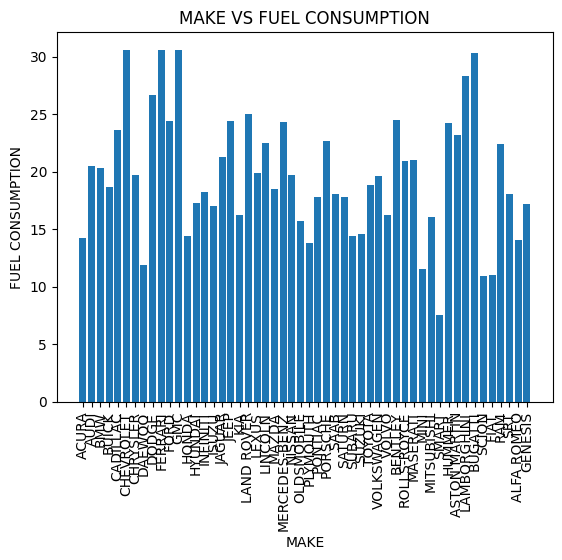

In [33]:
plt.bar(df['MAKE'], df['FUEL CONSUMPTION'])
plt.xlabel('MAKE', rotation = 0)
plt.ylabel('FUEL CONSUMPTION')
plt.title('MAKE VS FUEL CONSUMPTION')
plt.xticks(rotation=90)
plt.show()

<Axes: >

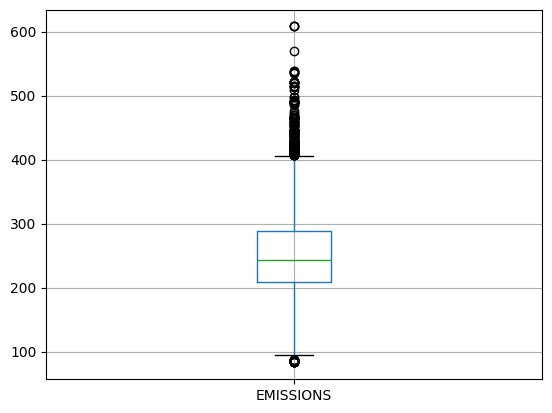

In [34]:
#Visualize the spread of the data and detect outliers for numerical features.
df.boxplot(column='EMISSIONS')

<Axes: >

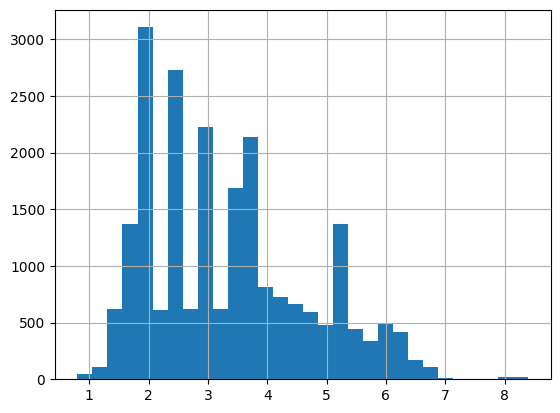

In [35]:
#Plot histograms for numerical features to visualize the distribution of the data and check for skewness or normality.
df['ENGINE SIZE'].hist(bins=30)

In [39]:
# dropping vehicles whose years are less than 2011
#  since they have a high maintenance and not suitable for this business
df.drop(df[df['YEAR'] < 2011].index, inplace=True)

In [40]:
df

YEAR   MAKE          MODEL  VEHICLE CLASS  ENGINE SIZE  CYLINDERS  \
9998   2011  ACURA            CSX        COMPACT          2.0          4   
9999   2011  ACURA            CSX        COMPACT          2.0          4   
10000  2011  ACURA            CSX        COMPACT          2.0          4   
10001  2011  ACURA        MDX AWD            SUV          3.7          6   
10002  2011  ACURA  RDX AWD TURBO            SUV          2.3          4   
...     ...    ...            ...            ...          ...        ...   
22551  2022  VOLVO    XC40 T5 AWD     SUV: SMALL          2.0          4   
22552  2022  VOLVO    XC60 B5 AWD     SUV: SMALL          2.0          4   
22553  2022  VOLVO    XC60 B6 AWD     SUV: SMALL          2.0          4   
22554  2022  VOLVO    XC90 T5 AWD  SUV: STANDARD          2.0          4   
22555  2022  VOLVO    XC90 T6 AWD  SUV: STANDARD          2.0          4   

      TRANSMISSION FUEL  FUEL CONSUMPTION  HWY (L/100 km)  COMB (L/100 km)  \
9998           AS5    X               9.5             6.5              8.1   
9999            M5    X               8.7             6.4              7.7   
10000           M6    Z              10.2             6.8              8.7   
10001          AS6    Z              13.2             9.6             11.6   
10002          AS5    Z              11.7             8.7             10.3   
...            ...  ...               ...             ...              ...   
22551          AS8    Z              10.7             7.7              9.4   
22552          AS8    Z              10.5             8.1              9.4   
22553          AS8    Z              11.0             8.7              9.9   
22554          AS8    Z              11.5             8.4             10.1   
22555          AS8    Z              12.4             8.9             10.8   

       COMB (mpg)  EMISSIONS  
9998           35        186  
9999           37        177  
10000          32        200  
10001          24        267  
10002          27        237  
...           ...        ...  
22551          30        219  
22552          30        219  
22553          29        232  
22554          28        236  
22555          26        252  

[12558 rows x 13 columns]

In [41]:
df.shape

(12558, 13)

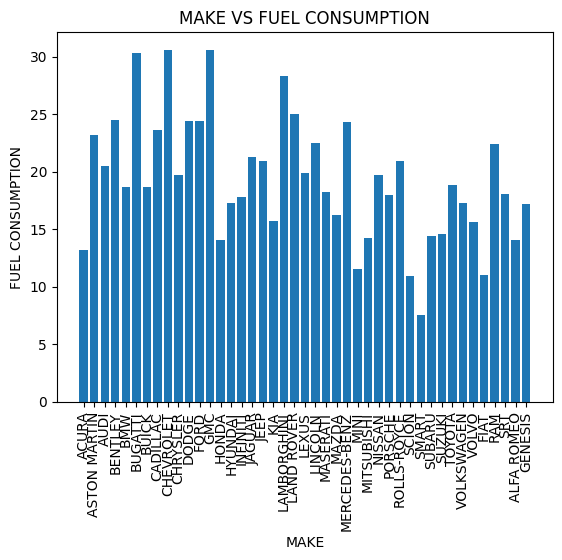

In [42]:
plt.bar(df['MAKE'], df['FUEL CONSUMPTION'])
plt.xlabel('MAKE', rotation = 0)
plt.ylabel('FUEL CONSUMPTION')
plt.title('MAKE VS FUEL CONSUMPTION')
plt.xticks(rotation=90)
plt.show()

using interquartile range to calculate outliers

In [44]:
## Assume 'df' is your DataFrame and 'column' is the column you want to check
Q1 = df['FUEL CONSUMPTION'].quantile(0.25)
Q3 = df['FUEL CONSUMPTION'].quantile(0.75)
IQR = Q3 - Q1

In [46]:
#Detect outliers
outliers = df[(df['FUEL CONSUMPTION'] < (Q1 - 1.5 * IQR)) | (df['FUEL CONSUMPTION'] > (Q3 + 1.5 * IQR))]

In [47]:
outliers

YEAR         MAKE                            MODEL  \
10134  2011      BUGATTI                           VEYRON   
10164  2011     CADILLAC                     ESCALADE AWD   
10166  2011     CADILLAC                 ESCALADE ESV AWD   
10218  2011    CHEVROLET           EXPRESS 2500 PASSENGER   
10220  2011    CHEVROLET           EXPRESS 2500 PASSENGER   
...     ...          ...                              ...   
22000  2022          GMC  Sierra 4WD Mud Terrain Tire FFV   
22159  2022  LAMBORGHINI               Aventador Countach   
22160  2022  LAMBORGHINI          Aventador Ultimae Coupe   
22161  2022  LAMBORGHINI       Aventador Ultimae Roadster   
22444  2022          RAM                     1500 4X4 TRX   

                VEHICLE CLASS  ENGINE SIZE  CYLINDERS TRANSMISSION FUEL  \
10134              TWO-SEATER          8.0         16          AS7    Z   
10164                     SUV          6.2          8           A6    E   
10166                     SUV          6.2          8           A6    E   
10218         VAN - PASSENGER          4.8          8           A6    E   
10220         VAN - PASSENGER          6.0          8           A6    E   
...                       ...          ...        ...          ...  ...   
22000  PICKUP TRUCK: STANDARD          5.3          8           A6    E   
22159              TWO-SEATER          6.5         12          AM7    Z   
22160              TWO-SEATER          6.5         12          AM7    Z   
22161              TWO-SEATER          6.5         12          AM7    Z   
22444  PICKUP TRUCK: STANDARD          6.2          8           A8    Z   

       FUEL CONSUMPTION  HWY (L/100 km)  COMB (L/100 km)  COMB (mpg)  \
10134              26.1            15.5             21.3          13   
10164              21.2            13.8             17.9          16   
10166              23.5            15.3             19.8          14   
10218              25.9            16.7             21.7          13   
10220              27.5            17.4             23.0          12   
...                 ...             ...              ...         ...   
22000              23.1            19.6             21.5          13   
22159              26.5            14.6             21.2          13   
22160              26.8            15.1             21.5          13   
22161              26.8            15.1             21.5          13   
22444              22.4            16.5             19.8          14   

       EMISSIONS  
10134        490  
10164        286  
10166        317  
10218        347  
10220        368  
...          ...  
22000        358  
22159        489  
22160        498  
22161        498  
22444        465  

[284 rows x 13 columns]

Dropping outliers using Z-score

In [48]:
from scipy.stats import zscore

In [49]:
#Calculate Z-scores for each value in the column
df['z_score'] = zscore(df['FUEL CONSUMPTION'])

In [50]:
#Define a threshold for identifying outliers, usually 3 or -3
df = df[(df['z_score'] <= 3) & (df['z_score'] >= -3)]

In [51]:
#Drop the 'z_score' column if no longer needed
df = df.drop(columns=['z_score'])

In [52]:
df.shape

(12450, 13)